# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy


In [62]:
from config import (weather_api_key, g_key)

# Dependencies
from citipy import citipy
import random
from random import uniform
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import pprint
from scipy.stats import linregress
import datetime

## Generate Cities List

In [3]:
# Creating a random sample for cities to search
def newlat():
   return uniform(-90, 90)

def newlon():
   return uniform(-180,180)
 
# for x in range(10):
#    print(newlat(), newlon())


In [232]:
# Looking up city coordinates with citipy
cities_list = []

for x in range(50):
    city = citipy.nearest_city(newlat(), newlon())
    cities_list.append(city)

# cities_list

cities = (city.city_name for city in cities_list)
# cities = pd.DataFrame(cities)
# cities.set_index(0)
# city.city_name    
# city.country_code
             

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [233]:
# Building the OpenWeatherMap query url

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

response = requests.get(query_url + 'reno').json()
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.53, 'lon': -119.81},
 'dt': 1601241897,
 'id': 5511077,
 'main': {'feels_like': 16.58,
          'humidity': 25,
          'pressure': 1026,
          'temp': 21.98,
          'temp_max': 23,
          'temp_min': 20.56},
 'name': 'Reno',
 'sys': {'country': 'US',
         'id': 5689,
         'sunrise': 1601214723,
         'sunset': 1601257672,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 100, 'speed': 5.1}}


In [234]:
# set up lists to hold reponse info
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
date=[]

# Loop for OpenWeatherMap API calls
print("Beginning Data Retrieval \n-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(float(response['coord']['lat']))
        lng.append(float(response['coord']['lon']))
        max_temp.append(float(response['main']['temp_max']))
        humidity.append(float(response['main']['humidity']))
        clouds.append(float(response['clouds']['all']))
        wind.append(float(response['wind']['speed']))
        country.append(response['sys']['country'])
        date.append(int(response['dt']))
        print(f"Processing record for {city}")
    except KeyError:
        print(f"X--X{city} not found. Skipping...")
        city_name.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        clouds.append(None)
        wind.append(None)
        country.append(None)
        date.append(None)

# print(date)
    

Beginning Data Retrieval 
-----------------------------
X--Xeskasem not found. Skipping...
Processing record for islamabad
Processing record for saint pete beach
Processing record for fortuna
Processing record for kutum
Processing record for punta arenas
X--Xtaolanaro not found. Skipping...
Processing record for ushuaia
Processing record for sitka
Processing record for laguna
Processing record for kinsale
Processing record for kachug
Processing record for grand gaube
Processing record for chaman
Processing record for thompson
X--Xilloqqortoormiut not found. Skipping...
Processing record for vostok
Processing record for barrow
X--Xattawapiskat not found. Skipping...
Processing record for kutum
Processing record for lazaro cardenas
Processing record for rikitea
Processing record for mataura
Processing record for belmonte
Processing record for arraial do cabo
Processing record for rikitea
Processing record for hermanus
Processing record for bredasdorp
Processing record for hermanus
Proces

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [235]:
city_data = pd.DataFrame(
    {'City': city_name,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Humidity': humidity,
     'Cloudiness': clouds,
     'Wind Speed': wind,
     'Country': country,
     'Date': date
    })

city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,Islamabad,33.71,73.13,22.78,78.0,20.0,3.55,PK,1.601242e+09
2,St. Pete Beach,27.73,-82.74,33.33,66.0,20.0,5.10,US,1.601242e+09
3,Fortuna,40.60,-124.16,26.11,47.0,20.0,7.70,US,1.601242e+09
4,Kutum,14.20,24.67,25.89,49.0,100.0,1.25,SD,1.601242e+09
5,Punta Arenas,-53.15,-70.92,11.00,53.0,40.0,17.00,CL,1.601242e+09
6,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
7,Ushuaia,-54.80,-68.30,8.00,49.0,40.0,5.10,AR,1.601242e+09
8,Sitka,57.05,-135.33,12.00,81.0,75.0,8.20,US,1.601242e+09
9,Laguna,38.42,-121.42,33.89,19.0,1.0,3.60,US,1.601242e+09


In [241]:
city_data = city_data.dropna()

In [242]:
city_data.to_csv('../Resources/city_data.csv', encoding='utf-8')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
city_data = pd.read_csv('../Resources/city_data.csv', encoding='utf-8')
del city_data['Unnamed: 0']
city_data = city_data.reset_index()
city_data.sort_values(by='Humidity', ascending=False)

# city_data

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
14,14,Barrow,71.29,-156.79,0.00,95.0,90.0,4.10,US,1.601242e+09
22,22,Hermanus,-34.42,19.23,6.67,93.0,1.0,1.01,ZA,1.601242e+09
34,34,Tasiilaq,65.61,-37.64,2.00,93.0,99.0,1.00,GL,1.601242e+09
28,28,Mataura,-46.19,168.86,3.33,93.0,100.0,2.24,NZ,1.601242e+09
18,18,Mataura,-46.19,168.86,3.33,93.0,100.0,2.24,NZ,1.601242e+09
8,8,Kinsale,51.71,-8.53,14.44,93.0,75.0,3.60,IE,1.601242e+09
24,24,Hermanus,-34.42,19.23,6.67,93.0,1.0,1.01,ZA,1.601242e+09
29,29,Chui,-33.70,-53.46,19.21,91.0,83.0,5.71,UY,1.601242e+09
36,36,Busselton,-33.65,115.33,12.22,91.0,42.0,4.40,AU,1.601242e+09
32,32,Tiksi,71.69,128.87,4.26,90.0,89.0,4.03,RU,1.601242e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
too_humid = city_data.loc[city_data['Humidity']> 100]
too_humid['index']


8      8
14    14
18    18
22    22
24    24
28    28
29    29
34    34
36    36
Name: index, dtype: int64

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(too_humid['index'], inplace=False)
clean_city_data

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Islamabad,33.71,73.13,22.78,78.0,20.0,3.55,PK,1.601242e+09
1,1,St. Pete Beach,27.73,-82.74,33.33,66.0,20.0,5.10,US,1.601242e+09
2,2,Fortuna,40.60,-124.16,26.11,47.0,20.0,7.70,US,1.601242e+09
3,3,Kutum,14.20,24.67,25.89,49.0,100.0,1.25,SD,1.601242e+09
4,4,Punta Arenas,-53.15,-70.92,11.00,53.0,40.0,17.00,CL,1.601242e+09
5,5,Ushuaia,-54.80,-68.30,8.00,49.0,40.0,5.10,AR,1.601242e+09
6,6,Sitka,57.05,-135.33,12.00,81.0,75.0,8.20,US,1.601242e+09
7,7,Laguna,38.42,-121.42,33.89,19.0,1.0,3.60,US,1.601242e+09
9,9,Kachug,53.96,105.88,2.98,84.0,78.0,2.12,RU,1.601242e+09
10,10,Grand Gaube,-20.01,57.66,22.78,77.0,94.0,3.58,MU,1.601242e+09


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
clean_city_data.head(3)

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Islamabad,33.71,73.13,22.78,78.0,20.0,3.55,PK,1.601242e+09
1,1,St. Pete Beach,27.73,-82.74,33.33,66.0,20.0,5.10,US,1.601242e+09
2,2,Fortuna,40.60,-124.16,26.11,47.0,20.0,7.70,US,1.601242e+09


Text(0.5, 1.0, 'Max Temperature (*C) vs. Latitude 2020-09-27 14:21:34')

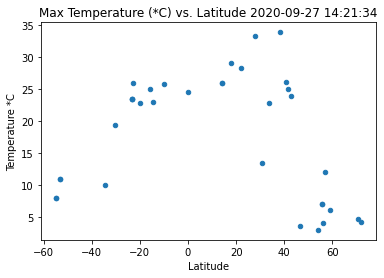

In [83]:
clean_city_data.plot.scatter(x='Lat', y='Max Temp')
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature *C')
plt.title(f'Max Temperature (*C) vs. Latitude {date}')

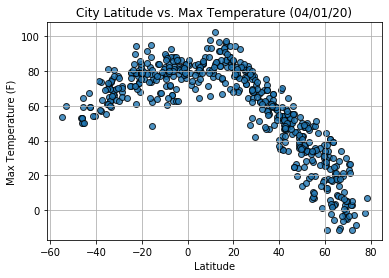

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity (%) vs. Latitude 2020-09-27 14:21:34')

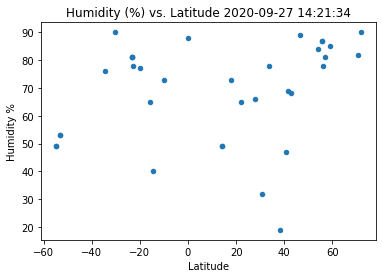

In [81]:
clean_city_data.plot.scatter(x='Lat', y='Humidity')
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Humidity (%) vs. Latitude {date}')

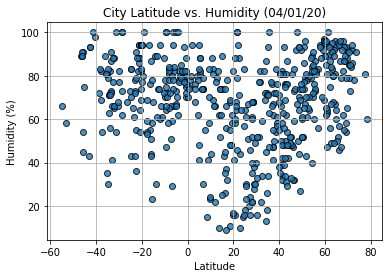

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude 2020-09-27 14:21:34')

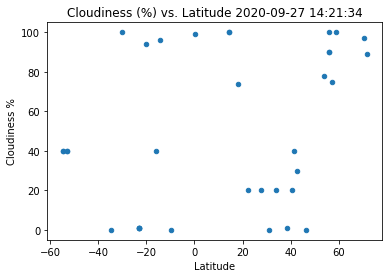

In [80]:
clean_city_data.plot.scatter(x='Lat', y='Cloudiness')
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Cloudiness (%) vs. Latitude {date}')

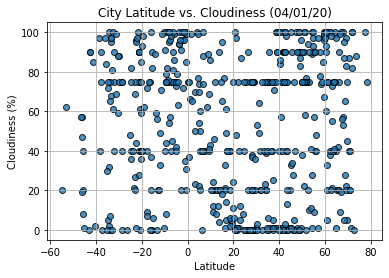

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed (m/sec) vs. Latitude 2020-09-27 14:21:34')

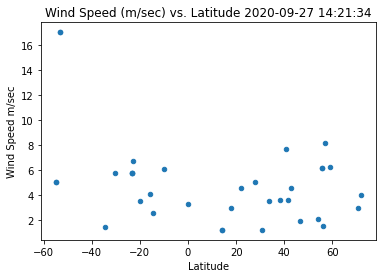

In [79]:
clean_city_data.plot.scatter(x='Lat', y='Wind Speed')
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.title(f'Wind Speed (m/sec) vs. Latitude {date}')

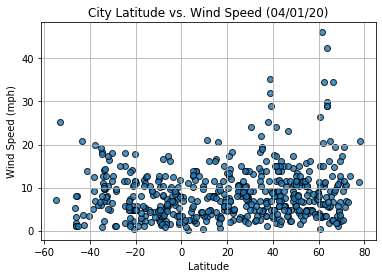

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [69]:
north_cities = clean_city_data.loc[clean_city_data['Lng']> 0]
north_cities.head(2)
date = datetime.datetime.fromtimestamp(north_cities.Date[0])
date = f"{date:%Y-%m-%d %H:%M:%S}"
date
# north_cities.plot.scatter(x='Lat', y='Max Temp')


'2020-09-27 14:21:34'

R squared: 0.4556285289292521


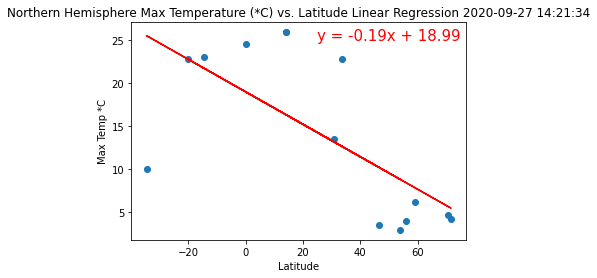

In [76]:
# Convert to floats and store Lat and Max Temp as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp *C')
plt.title(f'Northern Hemisphere Max Temperature (*C) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.46937863826630627


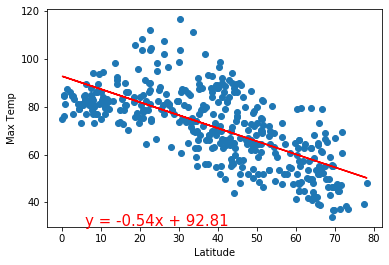

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [37]:
south_cities = clean_city_data.loc[clean_city_data['Lng']< 0]
south_cities.head(2)

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,St. Pete Beach,27.73,-82.74,33.33,66.0,20.0,5.1,US,1.601242e+09
2,2,Fortuna,40.60,-124.16,26.11,47.0,20.0,7.7,US,1.601242e+09


R squared: 0.05761445320137647


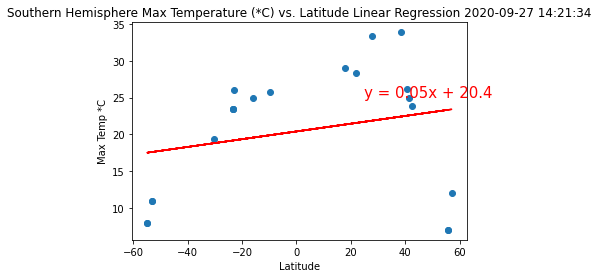

In [75]:
# Convert to floats and store Lat and Max Temp as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp *C')
plt.title(f'Southern Hemisphere Max Temperature (*C) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6082708688906918


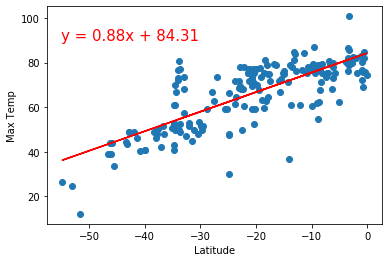

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.1433041356615512


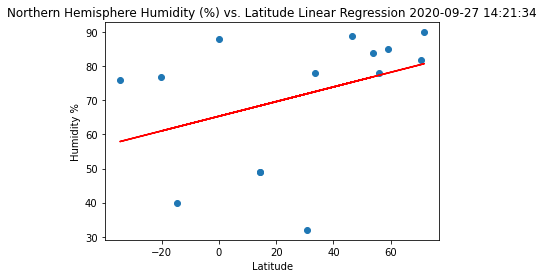

In [74]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Northern Hemisphere Humidity (%) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.000543987878808455


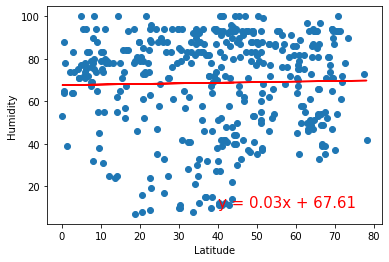

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.020925206051737227


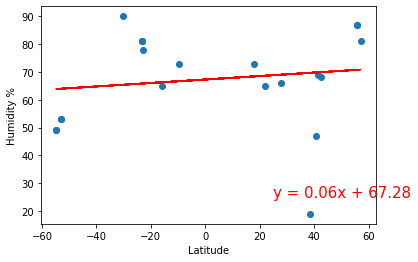

In [40]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Southern Hemisphere Humidity (%) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.014985174297345524


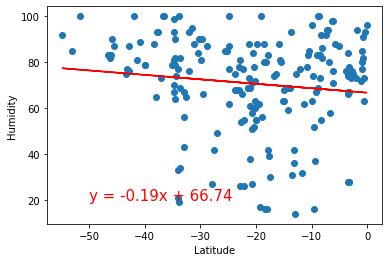

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.018626959688111403


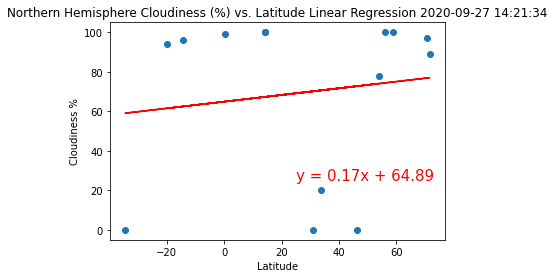

In [73]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Northern Hemisphere Cloudiness (%) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0020898727664228514


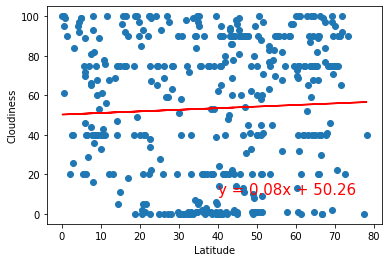

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.06588311432122901


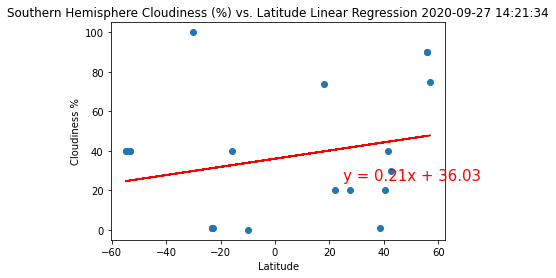

In [72]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0035263772085582894


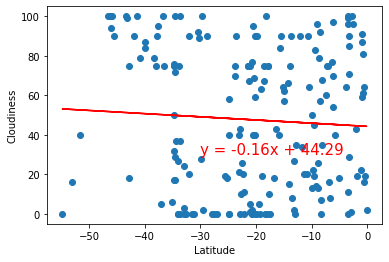

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.08061107490815565


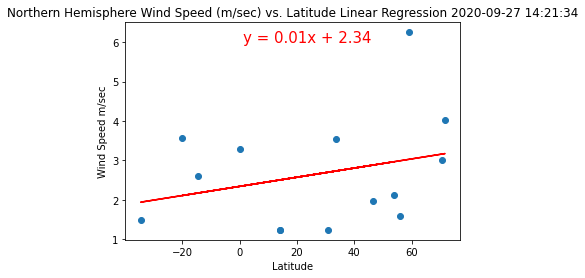

In [71]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = north_cities['Lat'].astype('float')
y_values = north_cities['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,6),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.title(f'Northern Hemisphere Wind Speed (m/sec) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04019723576144484


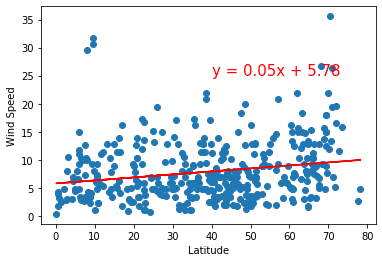

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.16000710841901408


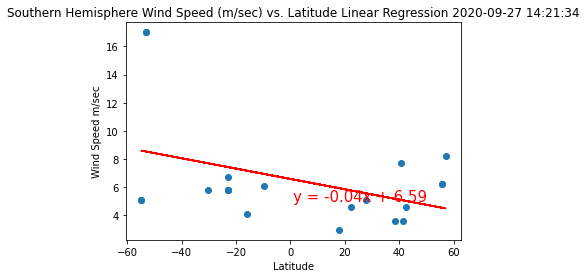

In [70]:
# Convert to floats and store Lat and Humidity as x and y values
x_values = south_cities['Lat'].astype('float')
y_values = south_cities['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.title(f'Southern Hemisphere Wind Speed (m/sec) vs. Latitude Linear Regression {date}')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.017128274759839232


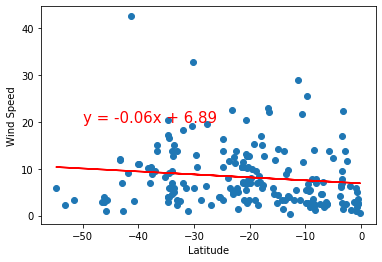